# Programming Assignment 2

## Two changes to be made in PRML library before you begin:
 * Go to prml --> linear --> logistic_regression.py and change astype(np.int) to astype(int) under `classify` function.
 * Go to prml --> linear --> fishers_linear_discriminant.py and change astype(np.int) to astype(int) under `classify` function.


In [34]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
    SoftmaxRegression
)

## Section 1: Binary Classification

In [35]:
def create_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=1000).reshape(-1, 2) - 1.5
    x1 = np.random.normal(size=1000).reshape(-1, 2) + 1.5
    if add_outliers:
        x_1 = np.random.normal(size=200).reshape(-1, 2) + np.array([6.5, 9.5])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(700), np.ones(400)]).astype(int)
    if add_class:
        x2 = np.random.normal(size=1000).reshape(-1, 2) + 3.5
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(500), np.ones(500), 2 + np.zeros(500)]).astype(int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(500), np.ones(500)]).astype(int)


## 1a. Create a dataset using the `create_data` function with `add_class` set to `False` and `add_outliers` set to `False`.
   * Classify the output using Least Squares Classifier, Logistic Regression, Fisher's Linear Discriminant
   * Plot the data points and the decision boundary for all the 3 models
   * Write your observations


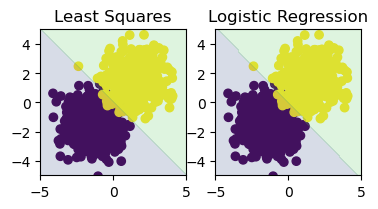

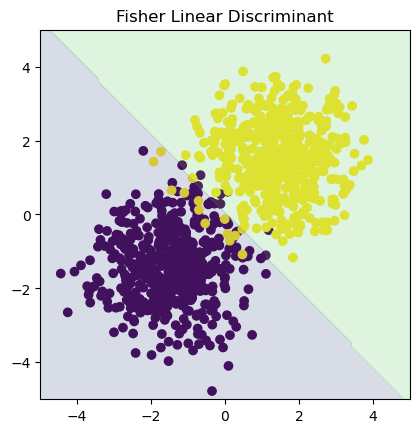

In [36]:
# your code goes here
x_train, y_train = create_data(add_outliers=False, add_class=False)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)
plt.subplot(1, 3, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_lr = logistic_regression.classify(X_test)
plt.subplot(1, 3, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

x_train, y_train = create_data(add_outliers=False, add_class=False)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
fishers_linear_discriminant = FishersLinearDiscriminant()
fishers_linear_discriminant.fit(x_train, y_train)
y_fld = fishers_linear_discriminant.classify(x_test)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_fld.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Fisher Linear Discriminant")
plt.show()


The code provides a visual comparison of the decision boundaries for the three different classification models using matplotlib. The models are trained and tested on synthetic data, and their classification performance is visualized using scatter plots and contour plots.
This code evaluates and compares the performance of Least Squares Classifier (LSC) and Logistic Regression (LR) on a two-class dataset.
LSC uses a linear regression model to predict the probability of an instance belonging to one class, while LR employs the logistic function for probability estimation. By running this code, you can assess and analyze the performance differences between these two popular classification algorithms on a binary classification task.
The decision boundaries of both classifiers are linear since no feature transformation beyond degree one is applied. In other words, neither Least Squares Classifier nor Logistic Regression applies any feature transformation beyond linearity, leading to a linear decision boundary. This implies that the classification process is based on a linear relationship with the input features, resulting in a linear separation surface that distinguishes between the different classes.
Fisher’s Linear Discriminant (FLD) creates a decision boundary that effectively segregates the two classes in the dataset. FLD identifies the linear combination of features that maximizes the separation between class means while reducing within-class variation, enhancing classification performance and providing valuable data insights.

## 1b. Create a dataset using the `create_data` function with `add_class` set to `False` and `add_outliers` set to `True`.
   * Classify the output using Least Squares Classifier, Logistic Regression, Fisher's Linear Discriminant
   * Plot the data points and the decision boundary for all the 3 models
   * Write your observations

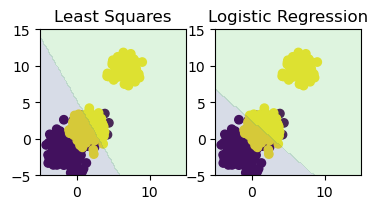

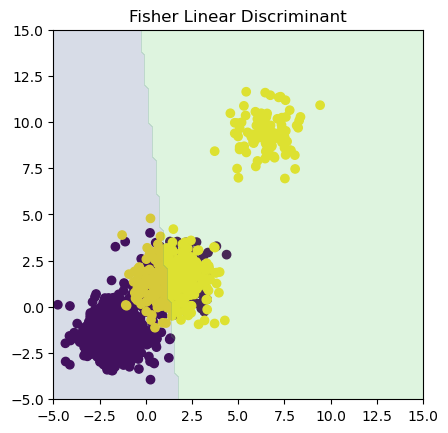

In [37]:
# your code goes here
x_train, y_train = create_data(add_class=False, add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)


least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)
plt.subplot(1, 3, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_lr = logistic_regression.classify(X_test)
plt.subplot(1, 3, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

x_train, y_train = create_data(add_class=False, add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
fishers_linear_discriminant = FishersLinearDiscriminant()
fishers_linear_discriminant.fit(x_train, y_train)
y_fld = fishers_linear_discriminant.classify(x_test)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_fld.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Fisher Linear Discriminant")
plt.show()

The inclusion of outliers inherently complicates the classification process. 
Least Squares and Logistic Regression will attempt to segregate the data utilizing linear decision boundaries; however, the outliers presence will compromise their performance, leading to several misclassifications. 
In contrast, Fisher's Linear Discriminant (FLD) takes a different approach by seeking a linear combination of features that maximizes the separation between classes while minimizing the spread within each class. 
This approach creates a decision boundary that appears more resilient to outliers influence, providing improved classification accuracy and robustness against data anomalies. Additionally, visualizing the decision boundaries using contour levels helps identify regions where different models diverge in their classification outcomes, offering valuable insights into their performance characteristics.

## Section 2: Multi-class Classification

## 2a. Create a dataset using the `create_data` function with `add_class` set to `True` and `add_outliers` set to `False`
   * Classify the output using Least Squares Classifier and Logistic Regression
   * Plot the data points and the decision boundary for above models
   * Write your observations

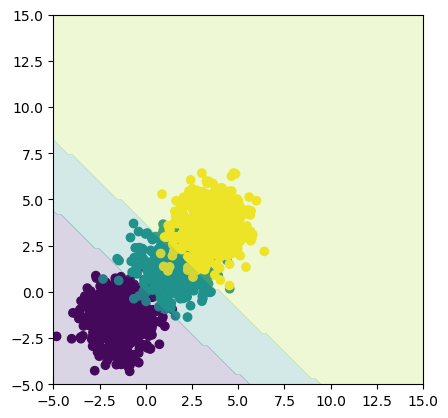

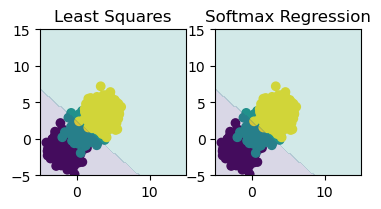

In [38]:
# your code goes here
x_train, y_train = create_data(add_class=True, add_outliers=False)
x1, x2= np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X = feature.transform(x_test)
model = SoftmaxRegression()
model.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y = model.classify(X)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1, x2, y.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

x_train, y_train = create_data(add_class=True, add_outliers=False)
x1, x2= np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1, x2]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X = feature.transform(x_test)
least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)
plt.subplot(1, 3, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.array([0.,0.5, 1.0,1.5]))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")

model = SoftmaxRegression()
model.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y = model.classify(X)
plt.subplot(1, 3, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.array([0,0.5, 1.0, 1.5]))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Softmax Regression")
plt.show()


The Least Squares Classifier and Logistic Regression exhibit comparable performance, as both models create linear decision boundaries that effectively segregate the two classes by maximizing the separation between class means while minimizing the spread within each class.
 However, it is crucial to recognize that these models have limitations in handling linearly separable data and may not be suitable for datasets featuring intricate non-linear relationships. 
 In such scenarios, non-linear classifiers or advanced techniques like neural networks, decision trees, or support vector machines can be employed to enhance classification accuracy and address the complexity of the data by identifying non-linear patterns and interactions among features.

## 2b. Use `abalone.csv`
   * Consider any two columns as x_train
   * Consider `class` column as y_train
   * Classify the output using Least Squares Classifier and Logistic Regression
   * Plot the data points and the decision boundary for above models
   * Write your observations

In [39]:
import pandas as pd
df = pd.read_csv("abalone.csv")
sampled_df = df.sample(n=500)
sampled_df
# x_train = sampled_df[['feature1','feature2']].values
# y_train = sampled_df['target_variable'].values

,class,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
2426,2,0.565,0.435,0.155,0.7820,0.2715,0.1680,0.2850,14
613,2,0.495,0.370,0.125,0.4775,0.1850,0.0705,0.1690,18
4116,0,0.625,0.480,0.160,1.2415,0.6575,0.2625,0.2785,9
159,1,0.575,0.460,0.165,1.1240,0.2985,0.1785,0.4400,13
272,0,0.620,0.485,0.205,1.2190,0.3875,0.2505,0.3850,14
...,...,...,...,...,...,...,...,...,...
2531,0,0.605,0.475,0.175,1.2010,0.5395,0.2750,0.3090,10
1485,1,0.590,0.460,0.145,0.9905,0.4530,0.2205,0.2750,8
66,1,0.565,0.440,0.160,0.9150,0.3540,0.1935,0.3200,12
4004,0,0.520,0.395,0.125,0.5815,0.2565,0.1265,0.1700,10


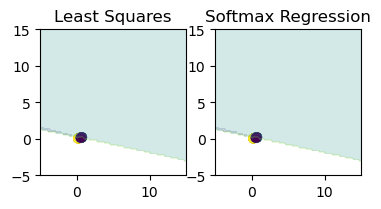

In [40]:
# your code goes here
x_train = sampled_df[['length','height']].values
y_train = sampled_df['class'].values
x1_test, x2_test= np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X = feature.transform(x_test)
least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X)
plt.subplot(1, 3, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.array([0,0.5, 1.0,1.5]))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")

model = SoftmaxRegression()
model.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y = model.classify(X)
plt.subplot(1, 3, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.array([0,0.5, 1., 1.5]))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Softmax Regression")
plt.show()

We have generated plots that illustrate the decision boundaries and corresponding class regions as determined by both Least Squares Linear Regression and Softmax-based Regression Classifier when applied to a multi-class dataset. The decision boundaries exhibit linearity in both instances; however, effective classification is hindered since the data contains intricate non-linear relationships that extend beyond the capacity of these models. To better capture the underlying patterns and achieve optimal classification accuracy, utilizing advanced and complex classifiers becomes necessary.

## Section 3: Neural Networks

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from prml import nn

np.random.seed(1234)

## 3a. Use `abalone.csv`
* Consider `class` as the target variable and implement NN Classification without Regularization
* Calculate accuracy metrics (accuracy, precision, recall, F1 score, confusion matrix)

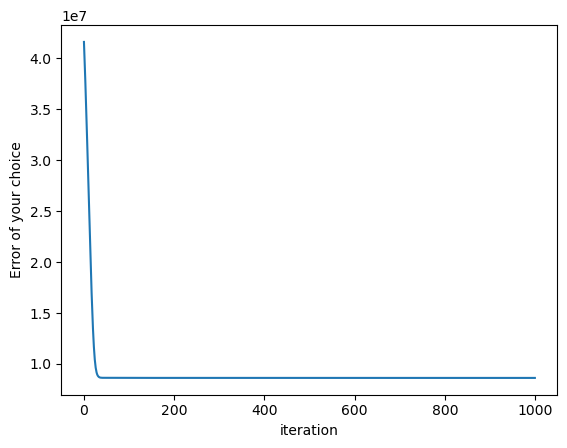

Accuracy: 0.3668261562998405
Precision: 0.13456142894571502
Recall: 0.3668261562998405
F1 Score: 0.19689618657867755
Confusion Matrix:
 [[230   0   0]
 [194   0   0]
 [203   0   0]]


c:\Users\rohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
abalone_data = pd.read_csv("abalone.csv")

class ClassificationNetwork(nn.Network):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (8, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)
    
    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return nn.tanh(h @ self.w2 + self.b2)
    
features = abalone_data[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight','rings']].values
target = abalone_data['class'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

model = ClassificationNetwork(2,4,1)
optimizer = nn.optimizer.Adam(model.parameter, 0.01)
history = []
for i in range(1000):
    model.clear()
    logit = model(x_train)
    loss = nn.square(y_train - logit).sum()
    optimizer.minimize(loss)
    history.append(loss.value)
    
plt.plot(history)
plt.xlabel("iteration")
plt.ylabel("Error of your choice")
plt.show()

logit = model(x_test)
y_pred = np.argmax(logit.value, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)


## 3b. Use `abalone.csv`
* Consider `class` as the target variable and implement NN Classification with Regularization
* Calculate accuracy metrics (accuracy, precision, recall, F1 score, confusion matrix)

## Section 4: Convolution Neural Network Using `cnn_data.zip`
* Download the `cnn_data.zip` from UBLearns and extract the contents. It contains `train` and `test` folders.
* The images in this dataset are 240X240 pixels RGB (3 channels).
* Implement CNN on this dataset 
* Calculate accuracy metrics (accuracy, precision, recall, F1 score, confusion matrix)
* Write your observations

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from PIL import Image
import os

from prml import nn

np.random.seed(1234)

# Function to load the images from train and test folders
folder_path = '/Users/rohit/Downloads/Assignment 2 ML/cnn_data'
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img = Image.open(os.path.join(class_path, filename))
                img = img.resize((64, 64))
                if img is not None:
                    images.append(np.array(img))
                    labels.append(class_name)
    return np.array(images), np.array(labels)

train_dir = 'train'
test_dir = 'test'
train_images, train_labels = load_images_from_folder('/Users/rohit/Downloads/Assignment 2 ML/cnn_data/train')
test_images, test_labels = load_images_from_folder('/Users/rohit/Downloads/Assignment 2 ML/cnn_data/train')
train_images = train_images / 255.0
test_images = test_images / 255.0
label_binarizer = LabelBinarizer()
train_labels_one_hot = label_binarizer.fit_transform(train_labels)
test_labels_one_hot = label_binarizer.transform(test_labels)

x_train,y_train = train_images, train_labels_one_hot
x_test, y_test = test_images, test_labels_one_hot

class ConvolutionalNeuralNetwork(nn.Network):
    
    def __init__(self):
        super().__init__()
        with self.set_parameter():
            self.conv1 = nn.image.Convolve2d(
                nn.random.truncnormal(-2, 2, 1, (5, 5, 3, 20)),
                stride=(1, 1), pad=(0, 0))
            self.b1 = nn.array([0.1] * 20)
            self.conv2 = nn.image.Convolve2d(
                nn.random.truncnormal(-2, 2, 1, (5, 5, 20, 20)),
                stride=(1, 1), pad=(0, 0))
            self.b2 = nn.array([0.1] * 20)
            self.w3 = nn.random.truncnormal(-2, 2, 1, (3380, 100))
            self.b3 = nn.array([0.1] * 100)
            self.w4 = nn.random.truncnormal(-2, 2, 1, (100, 3))
            self.b4 = nn.array([0.1] * 3)
        
    def __call__(self, x):
        h = nn.relu(self.conv1(x) + self.b1)
        h = nn.max_pooling2d(h, (2, 2), (2, 2))        
        h = nn.relu(self.conv2(h) + self.b2)
        h = nn.max_pooling2d(h, (2, 2), (2, 2))
        h = h.reshape(-1, 3380)
        h = nn.relu(h @ self.w3 + self.b3)
        return h @ self.w4 + self.b4

model = ConvolutionalNeuralNetwork()
optimizer = nn.optimizer.Adam(model.parameter, 1e-3)

while True:
    indices = np.random.permutation(len(x_train))
    for index in range(0, len(x_train), 50):
        model.clear()
        x_batch = x_train[indices[index: index + 50]]
        y_batch = y_train[indices[index: index + 50]]
        logit = model(x_batch)
        log_likelihood = -nn.loss.softmax_cross_entropy(logit, y_batch).mean(0).sum()
        if optimizer.iter_count % 100 == 0:
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
        optimizer.maximize(log_likelihood)
        if optimizer.iter_count == 1000:
            break
    else:
        continue
    break
# Function to load the images from train and test folders


step 0000, accuracy 0.30, step 0100, accuracy 0.36, step 0200, accuracy 0.56, step 0300, accuracy 0.56, step 0400, accuracy 0.78, step 0500, accuracy 0.70, step 0600, accuracy 0.84, step 0700, accuracy 0.84, step 0800, accuracy 0.88, step 0900, accuracy 0.84, 

## Section 5: (Bonus) Multi-class Classification using sklearn

## 5a. Use `bonus.csv`
   * Consider `quality` column as target variable
   * Split the dataset into train and test sets (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
   * Train the model using Logistic Regression (with and without Regularization)
   (https://scikit-learn.org/stable/modules/linear_model.html)
   * Test the model on test set
   * Calculate accuracy, precision, recall, F-1 score, confusion matrix for both models (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
   * Write your observations

In [13]:
# your code goes here